In [1]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 960.0 kB/s eta 0:00:01
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.1 MB 3.2 MB/s eta 0:00:03
   ---------------------------------------- 0.1/9.1 MB 3.2 MB/s eta 0:00:03
   ---------------------------------------- 0.1/9.1 MB 3.2 MB/s eta 0:00:03
   ---------------------------------------- 0.1/9.1 MB 3.2 MB/s eta 0:00:03
   ---------------------------------------- 0.1/9.1 MB 403.5 kB/s eta 0:00:23
    --------------------------------------- 0.1/9.1 MB 500.5 kB/s eta 0:00:18
    --------------------------------------- 0.2/9.1 MB 510.2 kB/s eta 0:00:18
   - -------------------------------------- 0.3/9.1 MB 714.4 kB/s eta 0:00:13
   - -----

[[ 1.08615309 -1.6227809   0.33127809]
 [ 0.36779787  0.09626867  0.69598791]
 [-0.63789943 -1.52593677  0.27049312]
 [ 1.37349517  1.583051    0.35153974]
 [-1.14074808 -0.23193585 -1.20860782]
 [-0.2068863  -0.47168461  1.20252932]
 [ 1.08615309 -1.19614526  0.95938944]
 [-0.35055734  0.61272035  0.95938944]
 [-0.06321526 -1.24602207 -0.90468297]
 [-0.92524152 -0.26382678  1.42540755]
 [-0.92524152 -1.59005869  1.4456692 ]
 [ 0.00862026 -0.70992194  0.20970815]
 [ 0.87064652  0.71273847  0.65546459]
 [ 1.15798861  0.24971542 -1.51253267]
 [ 0.00862026 -0.86831859 -1.79619587]
 [-1.49992569 -1.40751713 -0.88442131]
 [-0.13505078 -0.57083366  0.06787655]
 [-1.57176121  1.2454379  -0.29683327]
 [ 0.00862026  0.24990435  0.53389465]
 [ 1.44533069  1.64339438  0.63520294]
 [ 0.43963339 -0.3937332  -0.31709493]
 [ 1.01431756  1.19896179  0.2299698 ]
 [-1.57176121  1.28216537  1.50645417]
 [-0.2068863   1.47396437 -0.86415966]
 [ 0.65513996  0.66852948 -0.39814155]
 [-0.853406   -1.31029514

c:\Users\bluecom013\miniconda3\envs\openai\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bluecom013\miniconda3\envs\openai\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bluecom013\miniconda3\envs\openai\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bluecom013\miniconda3\envs\openai\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print

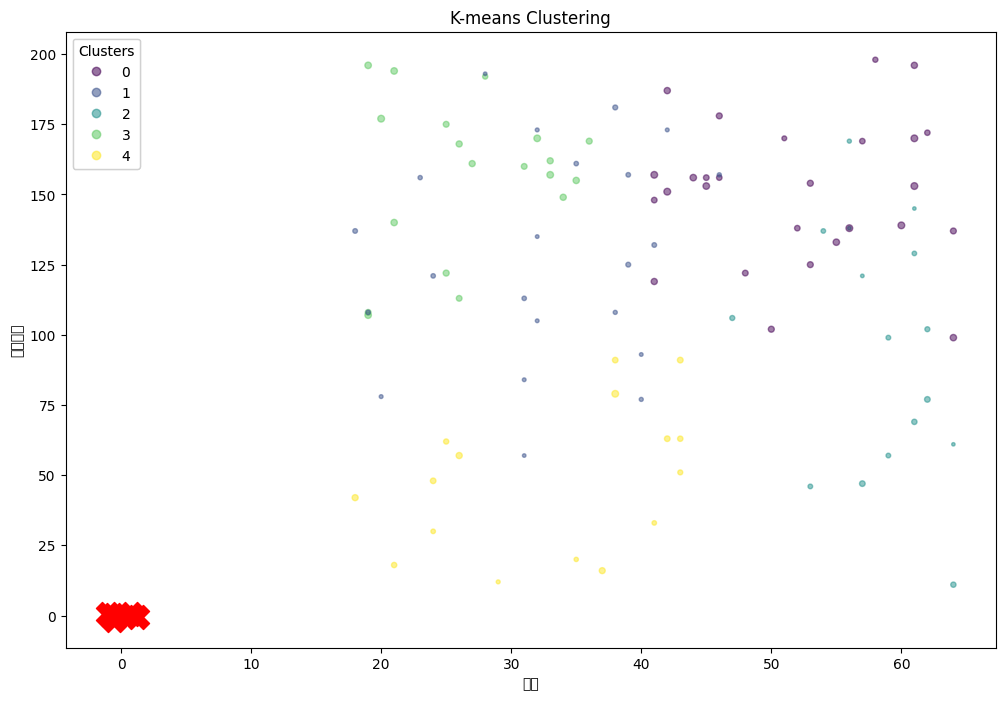

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 랜덤 데이터 생성
np.random.seed(42)
num_samples = 100

data = {
    '나이': np.random.randint(18, 65, num_samples),
    '연간소득': np.random.randint(30000, 120000, num_samples),
}

df = pd.DataFrame(data)

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print(scaled_data)
# K-means 클러스터링 모델 생성 및 학습
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# 클러스터별 데이터 시각화
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(df['나이'], df['구매금액'], c=df['Cluster'], cmap='viridis', s=df['연간소득'] / 5000, alpha=0.5)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X')
ax.set_title('K-means Clustering')
ax.set_xlabel('나이')
ax.set_ylabel('구매금액')

# 범례 추가
legend1 = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend1)

plt.show()
